# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.2 MB/s eta 0:00:00


In [3]:
import shap
import pandas as pd
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
def evaluation(y_test, y_pred):
  print('Misclassified samples: %d' % (y_test != y_pred).sum())
  result = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(result)
  sns.heatmap(result, annot=True)
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)
  result2 = 100* accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred, average='macro')
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred, average='macro')
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred, average='macro')
  print("F1:",result5)
  #result6 = roc_auc_score(y_test, y_pred, multi_class='ovo')
  #print("AUC:",result6)

# Load adv samples

In [5]:
feature_list = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']

In [12]:
#hsj_path = '/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/adv/hsj/adv_hsj_target.csv'
#hsj_label_path = '/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/adv/hsj/label_hsj_target.csv'

pdg_path = '/content/drive/MyDrive/Dataset/insdn/adv/pgd/adv_pgd_multi_target.csv'

In [13]:
pdg_df = pd.read_csv(pdg_path)

In [14]:
pdg_df.columns = feature_list
pdg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77203 entries, 0 to 77202
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      77203 non-null  float64
 1   Tot Fwd Pkts       77203 non-null  float64
 2   Tot Bwd Pkts       77203 non-null  float64
 3   TotLen Fwd Pkts    77203 non-null  float64
 4   TotLen Bwd Pkts    77203 non-null  float64
 5   Fwd Pkt Len Max    77203 non-null  float64
 6   Fwd Pkt Len Min    77203 non-null  float64
 7   Fwd Pkt Len Mean   77203 non-null  float64
 8   Fwd Pkt Len Std    77203 non-null  float64
 9   Bwd Pkt Len Max    77203 non-null  float64
 10  Bwd Pkt Len Min    77203 non-null  float64
 11  Bwd Pkt Len Mean   77203 non-null  float64
 12  Bwd Pkt Len Std    77203 non-null  float64
 13  Flow Byts/s        77203 non-null  float64
 14  Flow Pkts/s        77203 non-null  float64
 15  Flow IAT Mean      77203 non-null  float64
 16  Flow IAT Std       772

In [ ]:
#hsj_label = pd.read_csv(hsj_label_path)
#hsj_label.info()

# Load ML-based IDS model

In [9]:
import joblib
# load
model = joblib.load("/content/drive/MyDrive/InSDN/random_forest_smote.joblib")

In [15]:
y_pred = model.predict(pdg_df)

In [16]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [17]:
y_pred.shape

(77203,)

In [ ]:
evaluation(hsj_label.values, y_pred)

Correctly classified:

Class 1: 1

Class 2: 2

CLass 3: 134

# SHAP

In [19]:
explainer = shap.Explainer(model)

In [20]:
shap_values = explainer(pdg_df)

In [21]:
exp = shap.Explanation(shap_values[:,:,0], shap_values.base_values[:,0], pdg_df, feature_names=feature_list)

In [22]:
idx = 10

In [23]:
# Create a DataFrame with the SHAP values and feature names
df_shap_values = pd.DataFrame({'SHAP Values': exp[idx].values}, index=feature_list)
df_shap_values.sort_values(by=['SHAP Values'], ascending=False, inplace=True)
first_column = df_shap_values.iloc[:, 0][:10].tolist()

In [24]:
df_shap_values.head()

,SHAP Values
Bwd Pkt Len Min,0.057067
Pkt Size Avg,0.048740
Pkt Len Std,0.046510
Pkt Len Max,0.039290
Pkt Len Mean,0.029734


In [25]:
# Get the index as a list
index_list = df_shap_values.index[:10].tolist()

print(index_list)


['Bwd Pkt Len Min', 'Pkt Size Avg', 'Pkt Len Std', 'Pkt Len Max', 'Pkt Len Mean', 'Fwd Pkt Len Max', 'Bwd Seg Size Avg', 'Tot Fwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Max']


In [26]:
print(first_column)

[0.05706701142298282, 0.04873950585721053, 0.04651002555322309, 0.03929020526232883, 0.02973408106443929, 0.029302056868340202, 0.02497160165415166, 0.020394554424479308, 0.019122605435318216, 0.01846951442523516]


In [27]:
print(exp[idx].values)

[ 1.67355083e-03  2.03945544e-02  1.27033216e-02 -2.73430893e-03
  9.80436001e-03  2.93020569e-02  1.91226054e-02  1.46393626e-02
  1.43878222e-02  1.84695144e-02  5.70670114e-02  1.71295009e-02
 -9.89180184e-04  4.23825083e-03 -3.55544035e-03 -1.49570825e-03
  4.67582078e-03  1.05118737e-03  2.80018986e-03  1.43786645e-03
  9.72259643e-04  4.52134676e-03 -1.21261037e-03  1.06704877e-03
 -6.73382299e-03 -3.53883897e-03 -4.04136414e-03  1.67094019e-03
  1.62908335e-03  0.00000000e+00  7.26948001e-03  0.00000000e+00
  3.18155134e-04 -1.32733115e-02 -3.14612395e-02 -3.38562600e-04
 -1.08161732e-03  1.40666135e-02  3.92902053e-02  2.97340811e-02
  4.65100256e-02 -1.91906488e-03  4.77229346e-03  1.24525590e-02
  2.04929492e-04  6.58607646e-03  1.80213667e-02  6.23927664e-04
  0.00000000e+00  0.00000000e+00  1.19979818e-02  4.87395059e-02
  1.44892357e-02  2.49716017e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.89369594e-04  5.63993

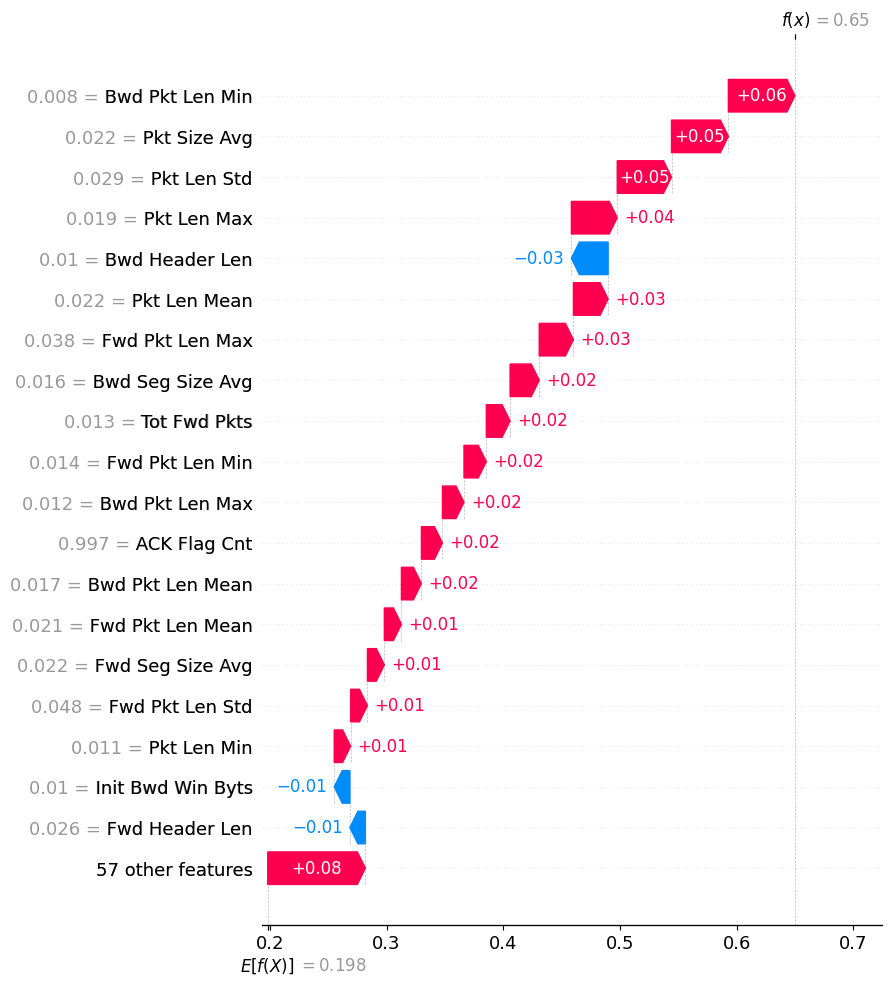

In [28]:
shap.plots.waterfall(exp[idx], max_display=20)

In [29]:
explainer.expected_value.shape

(8,)

In [30]:
print(explainer.expected_value)

[0.1981354  0.28483611 0.35395455 0.15458753 0.00407478 0.00155968
 0.0015264  0.00132556]


In [31]:
shap_values.shape

(77203, 76, 8)

In [32]:
shap_values.values.shape

(77203, 76, 8)

In [33]:
shap_values.base_values.shape

(77203, 8)

# Extract local feature for each adv sample (50000 in total)

In [ ]:
for idx in range(0, 50000):
  # Create a DataFrame with the SHAP values and feature names
  df_shap_values = pd.DataFrame({'SHAP Values': exp[idx].values}, index=feature_list)
  df_shap_values.sort_values(by=['SHAP Values'], ascending=False, inplace=True)
  df_shap_values.to_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/Result/SHAP_ADVSamples_' + str(idx) + '.csv')
  print('Extracted local importance feature of the ' + str(idx) + 'adv sample.')

# Detection phase

In [34]:
import os
import pandas as pd

In [35]:
whitelist_df = pd.read_csv('/content/drive/MyDrive/InSDN/top24_InSDN.csv')
whitelist_df.head(24)

,Feature,Frequency
0,Bwd Header Len,60910
1,Pkt Size Avg,48472
2,Pkt Len Max,48112
3,Fwd Header Len,47441
4,Pkt Len Std,46926
5,Pkt Len Mean,42886
6,Bwd Pkt Len Min,39930
7,Pkt Len Min,38137
8,Bwd Seg Size Avg,37411
9,Down/Up Ratio,36935


##Detection rate (top 24) = 38594/50000

In [36]:
whitelist = whitelist_df.iloc[:, 0][:24].tolist()
print(whitelist)

['Bwd Header Len', 'Pkt Size Avg', 'Pkt Len Max', 'Fwd Header Len', 'Pkt Len Std', 'Pkt Len Mean', 'Bwd Pkt Len Min', 'Pkt Len Min', 'Bwd Seg Size Avg', 'Down/Up Ratio', 'Init Bwd Win Byts', 'Fwd Seg Size Avg', 'Bwd Pkts/s', 'Subflow Bwd Pkts', 'Flow Pkts/s', 'Subflow Fwd Pkts', 'Tot Fwd Pkts', 'SYN Flag Cnt', 'FIN Flag Cnt', 'ACK Flag Cnt', 'Bwd Pkt Len Max', 'Fwd Pkt Len Max', 'Tot Bwd Pkts', 'Fwd Pkt Len Min']


In [37]:
# Create an empty dictionary to store the data
data_dict = {}

for idx in range(0, 50000):
  # Create a DataFrame with the SHAP values and feature names
  df_shap_values = pd.DataFrame({'SHAP Values': exp[idx].values}, index=feature_list)
  df_shap_values.sort_values(by=['SHAP Values'], ascending=False, inplace=True)
  index_list = df_shap_values.index[:10].tolist()

  # Add the list to the dictionary with the file name as the key
  data_dict['SHAP_ADVSamples_' + str(idx)] = index_list
  print('Extracted local importance feature of the ' + str(idx) + ' adv sample into dict.')

Streaming output truncated to the last 5000 lines.
Extracted local importance feature of the 45000 adv sample into dict.
Extracted local importance feature of the 45001 adv sample into dict.
Extracted local importance feature of the 45002 adv sample into dict.
Extracted local importance feature of the 45003 adv sample into dict.
Extracted local importance feature of the 45004 adv sample into dict.
Extracted local importance feature of the 45005 adv sample into dict.
Extracted local importance feature of the 45006 adv sample into dict.
Extracted local importance feature of the 45007 adv sample into dict.
Extracted local importance feature of the 45008 adv sample into dict.
Extracted local importance feature of the 45009 adv sample into dict.
Extracted local importance feature of the 45010 adv sample into dict.
Extracted local importance feature of the 45011 adv sample into dict.
Extracted local importance feature of the 45012 adv sample into dict.
Extracted local importance feature of t

In [38]:
# Print an item of data dictionary
for file_name, data_list in data_dict.items():
    print(file_name, ":", data_list)
    break

SHAP_ADVSamples_0 : ['Bwd Pkt Len Min', 'Pkt Len Std', 'Pkt Size Avg', 'Fwd Pkt Len Max', 'Pkt Len Max', 'Down/Up Ratio', 'Bwd Seg Size Avg', 'Pkt Len Mean', 'Tot Fwd Pkts', 'Bwd Pkt Len Mean']


In [39]:
alert = []

# Iterate over each key-value pair in the data_dict
for key, value in data_dict.items():
    # Check if there are one feature is not in the whitelist
    for string in value:
      if string not in whitelist:
        alert.append(key)
        break

# Print the alert dictionary
print("Alert list length:" + str(len(alert)))

Alert list length:30674


##Detection rate (top 38) = 29667/50000

In [40]:
whitelist2 = whitelist_df.iloc[:, 0][:38].tolist()
print(whitelist2)

['Bwd Header Len', 'Pkt Size Avg', 'Pkt Len Max', 'Fwd Header Len', 'Pkt Len Std', 'Pkt Len Mean', 'Bwd Pkt Len Min', 'Pkt Len Min', 'Bwd Seg Size Avg', 'Down/Up Ratio', 'Init Bwd Win Byts', 'Fwd Seg Size Avg', 'Bwd Pkts/s', 'Subflow Bwd Pkts', 'Flow Pkts/s', 'Subflow Fwd Pkts', 'Tot Fwd Pkts', 'SYN Flag Cnt', 'FIN Flag Cnt', 'ACK Flag Cnt', 'Bwd Pkt Len Max', 'Fwd Pkt Len Max', 'Tot Bwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd IAT Mean', 'Fwd Pkt Len Mean', 'Init Fwd Win Byts', 'Fwd Pkts/s', 'Flow IAT Min', 'Bwd PSH Flags', 'Bwd IAT Max', 'Bwd IAT Min', 'PSH Flag Cnt', 'Flow IAT Std', 'Flow Duration', 'Flow IAT Max', 'Bwd Pkt Len Std']


In [41]:
alert2 = []

# Iterate over each key-value pair in the data_dict
for key, value in data_dict.items():
    # Check if there are one feature is not in the whitelist
    for string in value:
      if string not in whitelist2:
        alert2.append(key)
        break

# Print the alert dictionary
print("Alert list length:" + str(len(alert2)))

Alert list length:6961
